# Exploratory analysis of the Shanghai Telecom Dataset

## requirements

- Shanghai Telecom dataset located at `{ROOT}/data/shanghai`

## import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tqdm
import heapq

# Read

In [2]:
from src.path import default_shanghai_dataset_path

raw: pd.DataFrame = pd.read_csv(f'{default_shanghai_dataset_path()}/data_6.1~6.15.csv')
raw['start time'] = pd.to_datetime(raw['start time'])
raw['end time'] = pd.to_datetime(raw['end time'])
raw

month  date          start time            end time   latitude  \
0       201406     1 2014-05-31 23:00:00 2014-06-01 01:38:30  31.129955   
1       201406     1 2014-05-31 23:00:00 2014-06-01 00:21:06  31.040378   
2       201406     1 2014-05-31 23:00:00 2014-06-01 00:48:36  30.889377   
3       201406     1 2014-05-31 23:00:00 2014-06-01 01:26:12  31.144812   
4       201406     1 2014-05-31 23:00:00 2014-06-01 00:02:10  31.056648   
...        ...   ...                 ...                 ...        ...   
563909  201406    15 2014-06-15 23:51:25 2014-06-15 23:54:36  31.232877   
563910  201406    15 2014-06-15 23:55:00 2014-06-15 23:55:00  31.228755   
563911  201406    15 2014-06-15 23:55:11 2014-06-15 23:55:11  31.232548   
563912  201406    15 2014-06-15 23:55:23 2014-06-15 23:57:15  31.227933   
563913  201406    15 2014-06-15 23:57:44 2014-06-15 23:58:17  31.218520   

         longitude                           user id  
0       121.336848  7ab7573e2b14415cbc5a5e6556671a28  
1       121.255563  bc36fa834270807686c235ab52bb827a  
2       121.176142  565b933233d70b1d0a822258e871a33f  
3       121.119606  5ffe3821c24673d3440e8f58da37508b  
4       121.404326  a79a4895f1ca2f0c8f2052236b4f29b5  
...            ...                               ...  
563909  121.487530  f03125c666c4dbe2b4ede13b5cec8970  
563910  121.523626  bb5a156e28b729a67b63871535d48c6f  
563911  121.478971  f03125c666c4dbe2b4ede13b5cec8970  
563912  121.453610  f03125c666c4dbe2b4ede13b5cec8970  
563913  121.440190  f03125c666c4dbe2b4ede13b5cec8970  

[563914 rows x 7 columns]

# Pre-process

## Clean data

remove rows with missing location values

In [3]:
df = raw.dropna()
df

month  date          start time            end time   latitude  \
0       201406     1 2014-05-31 23:00:00 2014-06-01 01:38:30  31.129955   
1       201406     1 2014-05-31 23:00:00 2014-06-01 00:21:06  31.040378   
2       201406     1 2014-05-31 23:00:00 2014-06-01 00:48:36  30.889377   
3       201406     1 2014-05-31 23:00:00 2014-06-01 01:26:12  31.144812   
4       201406     1 2014-05-31 23:00:00 2014-06-01 00:02:10  31.056648   
...        ...   ...                 ...                 ...        ...   
563909  201406    15 2014-06-15 23:51:25 2014-06-15 23:54:36  31.232877   
563910  201406    15 2014-06-15 23:55:00 2014-06-15 23:55:00  31.228755   
563911  201406    15 2014-06-15 23:55:11 2014-06-15 23:55:11  31.232548   
563912  201406    15 2014-06-15 23:55:23 2014-06-15 23:57:15  31.227933   
563913  201406    15 2014-06-15 23:57:44 2014-06-15 23:58:17  31.218520   

         longitude                           user id  
0       121.336848  7ab7573e2b14415cbc5a5e6556671a28  
1       121.255563  bc36fa834270807686c235ab52bb827a  
2       121.176142  565b933233d70b1d0a822258e871a33f  
3       121.119606  5ffe3821c24673d3440e8f58da37508b  
4       121.404326  a79a4895f1ca2f0c8f2052236b4f29b5  
...            ...                               ...  
563909  121.487530  f03125c666c4dbe2b4ede13b5cec8970  
563910  121.523626  bb5a156e28b729a67b63871535d48c6f  
563911  121.478971  f03125c666c4dbe2b4ede13b5cec8970  
563912  121.453610  f03125c666c4dbe2b4ede13b5cec8970  
563913  121.440190  f03125c666c4dbe2b4ede13b5cec8970  

[563914 rows x 7 columns]

filter first week rows

In [4]:
df = df[(df['end time'] >= datetime.datetime(2014, 6, 2)) & (df['start time'] < datetime.datetime(2014, 6, 9))]
df

month  date          start time            end time   latitude  \
32666   201406     2 2014-06-01 22:01:50 2014-06-02 00:27:25  31.190301   
32667   201406     2 2014-06-01 22:17:54 2014-06-02 01:17:57  31.159304   
32668   201406     2 2014-06-01 22:30:32 2014-06-02 01:30:32  31.304918   
32669   201406     2 2014-06-01 22:37:14 2014-06-02 00:44:03  31.344291   
32670   201406     2 2014-06-01 23:00:00 2014-06-02 00:29:16  31.227933   
...        ...   ...                 ...                 ...        ...   
292517  201406     9 2014-06-08 23:59:45 2014-06-09 02:58:16  30.999098   
292518  201406     9 2014-06-08 23:59:47 2014-06-09 00:00:21  31.420016   
292519  201406     9 2014-06-08 23:59:47 2014-06-09 00:20:55  31.420016   
292520  201406     9 2014-06-08 23:59:49 2014-06-09 00:00:22  31.121363   
292521  201406     9 2014-06-08 23:59:57 2014-06-09 01:51:47  31.255905   

         longitude                           user id  
32666   121.566862  2de4519f87257555362e943fe5e94c8a  
32667   121.358718  46db2aa2b4a90abdd3afd62e5345b9ca  
32668   121.497837  00a05a4f2b937fd38888c03213c4deb2  
32669   121.487858  73fd3da103e30d6d94f6ee883d865424  
32670   121.453610  47c4de3a088f1b7a3bfd5e0550131c10  
...            ...                               ...  
292517  121.447826  7cf336913be8af0fd1609b97328306fb  
292518  121.441130  4670e5a8bda03ca4a7c01edbd587c145  
292519  121.441130  4670e5a8bda03ca4a7c01edbd587c145  
292520  121.369095  e2c7c19303c4d82932d7156e9b61e571  
292521  121.430231  0dd75afd4945e9e901cd39de518bafc2  

[259525 rows x 7 columns]

remove base station not in Shanghai

In [5]:
df = df[(df['longitude'] >= 120.9) & (df['longitude'] <= 121.9)]
df = df[(df['latitude'] >= 30.69) & (df['latitude'] <= 31.51)]
df

month  date          start time            end time   latitude  \
32666   201406     2 2014-06-01 22:01:50 2014-06-02 00:27:25  31.190301   
32667   201406     2 2014-06-01 22:17:54 2014-06-02 01:17:57  31.159304   
32668   201406     2 2014-06-01 22:30:32 2014-06-02 01:30:32  31.304918   
32669   201406     2 2014-06-01 22:37:14 2014-06-02 00:44:03  31.344291   
32670   201406     2 2014-06-01 23:00:00 2014-06-02 00:29:16  31.227933   
...        ...   ...                 ...                 ...        ...   
292517  201406     9 2014-06-08 23:59:45 2014-06-09 02:58:16  30.999098   
292518  201406     9 2014-06-08 23:59:47 2014-06-09 00:00:21  31.420016   
292519  201406     9 2014-06-08 23:59:47 2014-06-09 00:20:55  31.420016   
292520  201406     9 2014-06-08 23:59:49 2014-06-09 00:00:22  31.121363   
292521  201406     9 2014-06-08 23:59:57 2014-06-09 01:51:47  31.255905   

         longitude                           user id  
32666   121.566862  2de4519f87257555362e943fe5e94c8a  
32667   121.358718  46db2aa2b4a90abdd3afd62e5345b9ca  
32668   121.497837  00a05a4f2b937fd38888c03213c4deb2  
32669   121.487858  73fd3da103e30d6d94f6ee883d865424  
32670   121.453610  47c4de3a088f1b7a3bfd5e0550131c10  
...            ...                               ...  
292517  121.447826  7cf336913be8af0fd1609b97328306fb  
292518  121.441130  4670e5a8bda03ca4a7c01edbd587c145  
292519  121.441130  4670e5a8bda03ca4a7c01edbd587c145  
292520  121.369095  e2c7c19303c4d82932d7156e9b61e571  
292521  121.430231  0dd75afd4945e9e901cd39de518bafc2  

[255962 rows x 7 columns]

## Discretize data by datetime

### sort dataframe by date and start time

In [6]:
df: pd.DataFrame = df.sort_values(by=['date', 'start time'], ascending=True)
df

month  date          start time            end time   latitude  \
32666   201406     2 2014-06-01 22:01:50 2014-06-02 00:27:25  31.190301   
32667   201406     2 2014-06-01 22:17:54 2014-06-02 01:17:57  31.159304   
32668   201406     2 2014-06-01 22:30:32 2014-06-02 01:30:32  31.304918   
32669   201406     2 2014-06-01 22:37:14 2014-06-02 00:44:03  31.344291   
32670   201406     2 2014-06-01 23:00:00 2014-06-02 00:29:16  31.227933   
...        ...   ...                 ...                 ...        ...   
292517  201406     9 2014-06-08 23:59:45 2014-06-09 02:58:16  30.999098   
292518  201406     9 2014-06-08 23:59:47 2014-06-09 00:00:21  31.420016   
292519  201406     9 2014-06-08 23:59:47 2014-06-09 00:20:55  31.420016   
292520  201406     9 2014-06-08 23:59:49 2014-06-09 00:00:22  31.121363   
292521  201406     9 2014-06-08 23:59:57 2014-06-09 01:51:47  31.255905   

         longitude                           user id  
32666   121.566862  2de4519f87257555362e943fe5e94c8a  
32667   121.358718  46db2aa2b4a90abdd3afd62e5345b9ca  
32668   121.497837  00a05a4f2b937fd38888c03213c4deb2  
32669   121.487858  73fd3da103e30d6d94f6ee883d865424  
32670   121.453610  47c4de3a088f1b7a3bfd5e0550131c10  
...            ...                               ...  
292517  121.447826  7cf336913be8af0fd1609b97328306fb  
292518  121.441130  4670e5a8bda03ca4a7c01edbd587c145  
292519  121.441130  4670e5a8bda03ca4a7c01edbd587c145  
292520  121.369095  e2c7c19303c4d82932d7156e9b61e571  
292521  121.430231  0dd75afd4945e9e901cd39de518bafc2  

[255962 rows x 7 columns]

### group by datetime

In [7]:
current_dt = datetime.datetime(2014, 6, 2, 0, 0, 0)
dt_min = 30
dt_per_day = 24 * 60 // dt_min
delta = datetime.timedelta(minutes=dt_min)

current_dt += delta

class Record:
    def __init__(self, uid: str, loc: tuple[float, float]):
        '''
        Args:
        ---
        - uid: user id
        - loc: location (lat, long)
        '''
        self.uid = uid
        self.loc = loc

class RecordBucket:
    def __init__(self, tstamp: datetime.datetime):
        '''
        Args:
        ---
        - tstamp: bucket timestamp
        '''
        self.tstamp = tstamp
        self.ls: list[Record] = []

    def append(self, rec: Record):
        self.ls.append(rec)

In [8]:
import math

connections = [RecordBucket(current_dt + datetime.timedelta(seconds=int(delta.total_seconds()) * i)) for i in range(dt_per_day * 7)]

for i, row in tqdm.tqdm(df.iterrows(), total=len(df), leave=False):

    j = math.floor((row['start time'] - current_dt).total_seconds()) // (dt_min * 60)

    span = math.floor((row['end time'] - row['start time']).total_seconds()) // (dt_min * 60)

    for k in range(max(0, j), min(j + span + 1, len(connections))):
        connections[k].append(Record(row['user id'], (row['latitude'], row['longitude'])))

### select most frequent base station per user per time slot

In [9]:
agg_connections: list[RecordBucket] = []

for conn in tqdm.tqdm(connections, total=len(connections), leave=False):
    b = RecordBucket(conn.tstamp)

    # aggregation
    # cluster by user id and base station
    sorted_conn = sorted(conn.ls, key=lambda el: (el.uid, el.loc))
    i = 0

    while i < len(sorted_conn):
        curr_uid = sorted_conn[i].uid
        curr_bs = sorted_conn[i].loc
        curr_bs_cnt = 1
        max_bs = curr_bs
        max_bs_cnt = curr_bs_cnt

        # find most frequent location visited by an user within one timeslot
        i += 1
        while i < len(sorted_conn) and sorted_conn[i].uid == curr_uid:
            if sorted_conn[i].loc != curr_bs:
                if curr_bs_cnt >= max_bs_cnt:
                    max_bs = curr_bs
                    max_bs_cnt = curr_bs_cnt

                curr_bs = sorted_conn[i].loc
                curr_bs_cnt = 1
            else:
                curr_bs_cnt += 1

            i += 1

        b.append(Record(curr_uid, curr_bs))
    

    agg_connections.append(b)

  0%|          | 0/336 [00:00<?, ?it/s]

# Extract sparse trajectories

In [10]:
class Trajectory:
    def __init__(self, begin: int, locs: list[tuple[float, float]]):
        assert len(locs) > 0
        
        self.begin = begin
        self.path = locs

class AggregatedTrajectory:
    def __init__(self, uid: str, trajs: list[Trajectory]):
        self.uid = uid
        self.trajs = trajs

    def bs_freq(self):
        ht: dict[tuple[float, float], int] = dict()

        for traj in self.trajs:
            for pt in traj.path:
                ht[pt] = ht.get(pt, 0) + 1

        return ht
    
    def k_most_freq(self, k: int):
        return heapq.nlargest(k, self.bs_freq().items(), key=lambda el: el[1])
    
class AggregatedTrajectoryDict(dict[str, AggregatedTrajectory]):
    def all_trajs(self):
        for agg_traj in self.values():
            yield from agg_traj.trajs

    def add_traj(self, uid: str, traj: Trajectory):
        if uid not in self:
            self[uid] = AggregatedTrajectory(uid, [traj])
        else:
            self[uid].trajs.append(traj)

In [11]:
trajs = AggregatedTrajectoryDict()
prev_step: dict[str, Trajectory] = dict()

for i in tqdm.trange(len(agg_connections), leave=False):
    conn = connections[i]

    curr_step = dict((r.uid, r.loc) for r in conn.ls)

    for uid, traj in prev_step.items():
        if uid not in curr_step:
            trajs.add_traj(uid, traj)

    new_step: dict[str, Trajectory] = dict()

    for uid, bs in curr_step.items():
        if uid in prev_step:
            new_step[uid] = prev_step[uid]
            new_step[uid].path.append(bs)
        else:
            new_step[uid] = Trajectory(i, [bs])

    prev_step = new_step

for uid, traj in prev_step.items():
    trajs.add_traj(uid, traj)

del prev_step
del curr_step
del new_step

trajectories cut-off daily

In [12]:
trajs_daily = AggregatedTrajectoryDict()

for i in tqdm.trange(0, len(agg_connections), dt_per_day, leave=False):
    prev_step: dict[str, AggregatedTrajectory] = dict()

    for j in range(dt_per_day):
        conn = agg_connections[i + j]

        curr_step = dict((r.uid, r.loc) for r in conn.ls)

        for uid, traj in prev_step.items():
            if uid not in curr_step:
                trajs_daily.add_traj((uid, i), traj)

        new_step: dict[str, Trajectory] = dict()

        for uid, bs in curr_step.items():
            if uid in prev_step:
                new_step[uid] = prev_step[uid]
                new_step[uid].path.append(bs)
            else:
                new_step[uid] = Trajectory(i, [bs])

        prev_step = new_step

    for uid, traj in prev_step.items():
        trajs_daily.add_traj((uid, i), traj)

del prev_step
del curr_step
del new_step

# Analysis

## count stat

no. connections

In [13]:
len(df)

255962

In [14]:
len(raw)

563914

no. unique users

In [15]:
count_unique_users = len(set(df['user id']))
count_unique_users

5182

In [16]:
len(set(raw['user id']))

6262

no. base stations

In [17]:
unique_locs = set((r['latitude'], r['longitude']) for _, r in df.iterrows())
count_locs = len(unique_locs)
count_locs

2561

All base stations

In [18]:
import folium

# plot shanghai
map = folium.Map(location=[31.11, 121.49], tiles="CartoDB Positron", zoom_start=3.5)

unique_locs = set((r['latitude'], r['longitude']) for _, r in raw.dropna().iterrows())

for loc in unique_locs:
    folium.CircleMarker(location=loc, radius=2, weight=5).add_to(map)

map

filtered base stations

In [24]:
import folium

# plot shanghai
map = folium.Map(location=[31.11, 121.49], tiles="CartoDB Positron", zoom_start=9.8)

unique_locs = set((r['latitude'], r['longitude']) for _, r in df.iterrows())

for loc in unique_locs:
    folium.CircleMarker(location=loc, radius=2, weight=5).add_to(map)

map

record duration

(array([170496.,  30709.,      0.,  13134.,      0.,   8921.,   6873.,
             0.,  25467.,    362.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

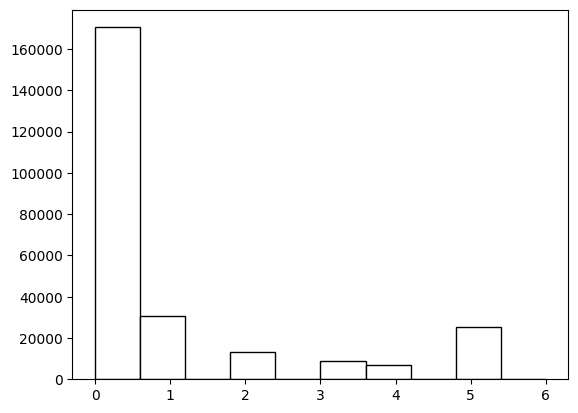

In [25]:
plt.hist((df['end time'] - df['start time']).map(lambda x: x.total_seconds() // (60 * dt_min)), color='white', ec='black')

## time series

### network traffic

traffic is periodic

Text(0, 0.5, 'traffic')

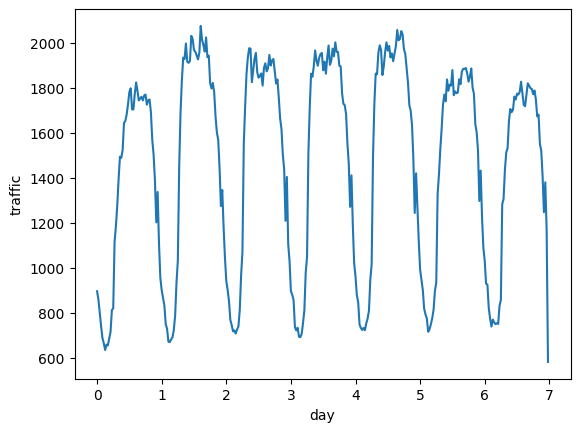

In [26]:
plt.plot([t / dt_per_day for t in range(7 * dt_per_day)], [len(b.ls) for b in connections])
plt.xlabel('day')
plt.ylabel('traffic')

### unique users over time

Text(0, 0.5, 'traffic')

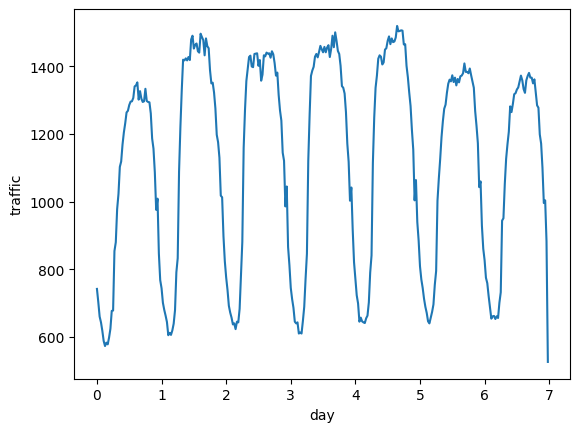

In [27]:
plt.plot([t / dt_per_day for t in range(7 * dt_per_day)], [len(b.ls) for b in agg_connections])
plt.xlabel('day')
plt.ylabel('traffic')

## Persistence

### persistent users

#### timeslot

No users are active in all timeslots.

In [28]:
persistent_users = set(r.uid for r in connections[0].ls)

for i in range(1, len(connections)):
    persistent_users = persistent_users.intersection(set(r.uid for r in connections[i].ls))

count_persistent_users = len(persistent_users)
del persistent_users
count_persistent_users / count_unique_users

0.0

#### day

around one-third of users are active everyday

In [29]:
persistent_users = None
i = 0

while i < len(connections):
    daily_users = set()

    for _ in range(len(connections) // 7):
        daily_users = daily_users.union(set(r.uid for r in connections[i].ls))
        i += 1

    if persistent_users is None:
        persistent_users = daily_users
    else:
        persistent_users = persistent_users.intersection(daily_users)

count_daily_persistent_users = len(persistent_users)
del persistent_users
del daily_users
count_daily_persistent_users / count_unique_users

0.3353917406406793

## Trajectory

### average length of all trajectories

(array([6.5719e+04, 2.1910e+03, 3.5200e+02, 1.1800e+02, 4.9000e+01,
        3.2000e+01, 1.0000e+01, 1.5000e+01, 4.0000e+00, 5.0000e+00]),
 array([  1. ,  23.4,  45.8,  68.2,  90.6, 113. , 135.4, 157.8, 180.2,
        202.6, 225. ]),
 <BarContainer object of 10 artists>)

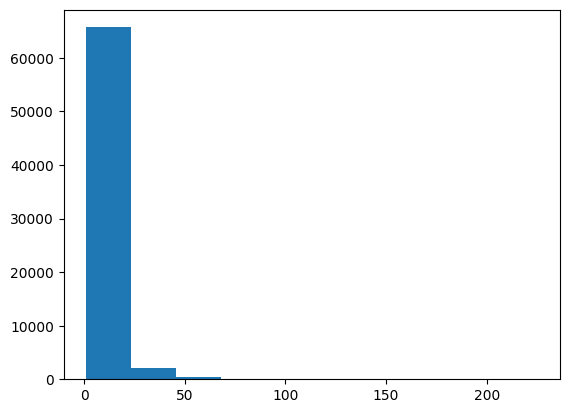

In [30]:
plt.hist([len(traj.path) for traj in trajs.all_trajs()])

### average length of trajectories (cutting off daily)

dense completeness

(array([0.0000e+00, 2.6930e+04, 1.1343e+04, 6.6810e+03, 4.3120e+03,
        3.1830e+03, 3.3900e+03, 2.3370e+03, 1.6500e+03, 1.4040e+03,
        1.2340e+03, 9.9000e+02, 1.2010e+03, 7.7900e+02, 6.6200e+02,
        5.8400e+02, 5.4100e+02, 4.6100e+02, 5.1800e+02, 4.3700e+02,
        3.4100e+02, 3.3000e+02, 2.7000e+02, 2.5500e+02, 2.7100e+02,
        1.9900e+02, 2.1200e+02, 1.5100e+02, 1.4200e+02, 1.6600e+02,
        1.3100e+02, 1.3300e+02, 1.1700e+02, 1.0300e+02, 7.2000e+01,
        1.1600e+02, 7.4000e+01, 5.5000e+01, 4.8000e+01, 4.7000e+01,
        4.4000e+01, 3.5000e+01, 4.4000e+01, 2.9000e+01, 3.5000e+01,
        3.0000e+01, 1.6000e+01, 3.6500e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48.]),
 <BarContainer object of 48 artists>)

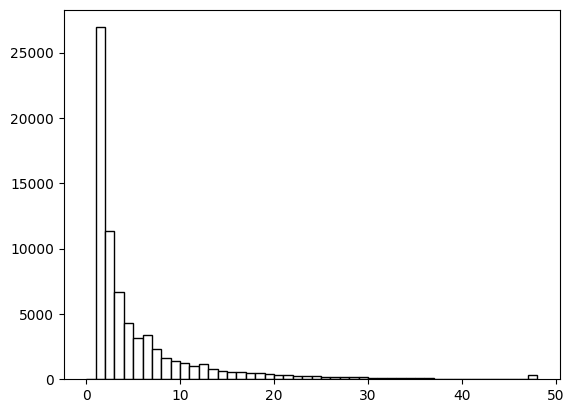

In [31]:
plt.hist([len(traj.path) for traj in trajs_daily.all_trajs()], bins=[*range(0, dt_per_day + 1, 1)], color='white', ec='black')

sparse completeness

In [32]:
sparse_trajs_daily = AggregatedTrajectoryDict()

for i in tqdm.tqdm(range(0, len(agg_connections), dt_per_day), total=len(agg_connections), leave=False):
    prev_step: dict[str, Trajectory] = dict()

    for j in range(dt_per_day):
        conn = agg_connections[i + j]

        curr_step = dict((r.uid, r.loc) for r in conn.ls)

        for uid, traj in prev_step.items():
            if uid not in curr_step:
                sparse_trajs_daily.add_traj((uid, i), traj)

        new_step: dict[str, Trajectory] = dict()

        for uid, bs in curr_step.items():
            if uid in prev_step:
                new_step[uid] = prev_step[uid]
                new_step[uid].path.append(bs)
            else:
                new_step[uid] = Trajectory(j, [bs])

        prev_step = new_step

    for uid, traj in prev_step.items():
        sparse_trajs_daily.add_traj((uid, i), traj)

del prev_step
del curr_step
del new_step

Text(0, 0.5, 'cum freq')

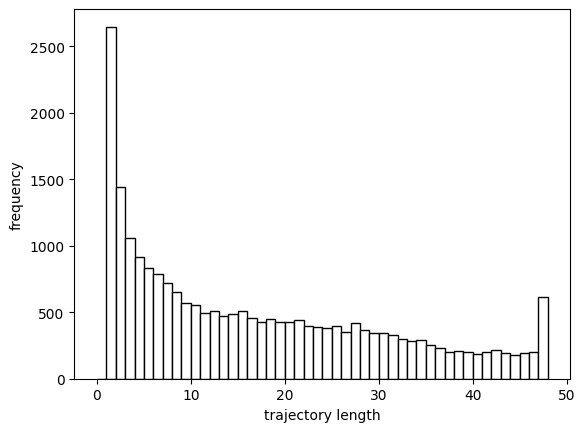

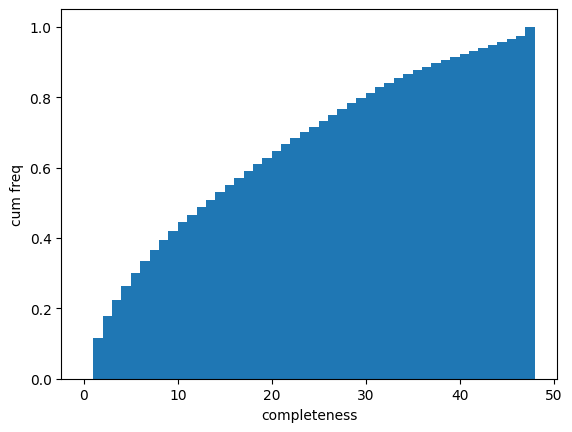

In [41]:
plt.hist(
    [sum(len(t.path) for t in b.trajs) for b in sparse_trajs_daily.values()], 
    bins=[*range(0, dt_per_day + 1, 1)], 
    color='white', ec='black'
)

plt.xlabel('trajectory length')
plt.ylabel('frequency')

plt.figure()

plt.hist(
    [sum(len(t.path) for t in b.trajs) for b in sparse_trajs_daily.values()], 
    bins=[*range(0, dt_per_day + 1, 1)],
    cumulative=True,
    density=True,
)

plt.xlabel('completeness')
plt.ylabel('cum freq')

time difference between sub-trajectories within a day

Text(0.5, 1.0, 'length of degenerate sub-trajectories')

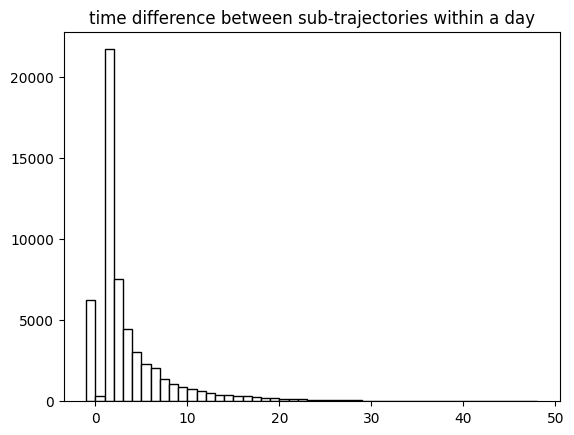

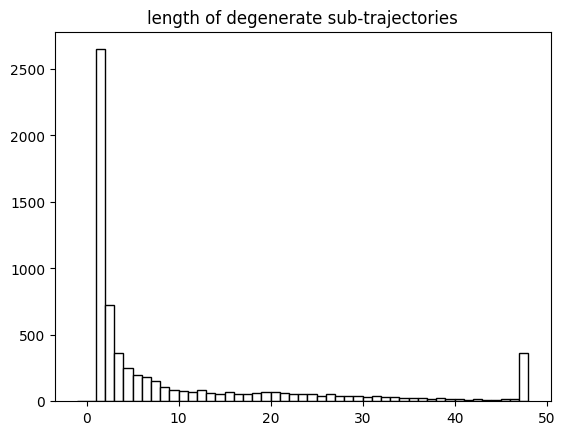

In [34]:
td = []
ln = []

for b in sparse_trajs_daily.values():
    if len(b.trajs) == 1:
        if len(b.trajs[0].path) == dt_per_day:
            td.append(0)
        else:
            td.append(-1)

        ln.append(len(b.trajs[0].path))
        continue

    for i in range(1, len(b.trajs)):
        td.append(
            b.trajs[i].begin - (b.trajs[i - 1].begin + len(b.trajs[i - 1].path))
        ) 


plt.hist(
    td,
    bins=[*range(-1, dt_per_day + 1)],
    color='white', ec='black'
)

plt.title('time difference between sub-trajectories within a day')

plt.figure()

plt.hist(
    ln,
    bins=[*range(-1, dt_per_day + 1)],
    color='white', ec='black'
)

plt.title('length of degenerate sub-trajectories')

visualize random trajectory

In [35]:
import random
import folium

# plot shanghai
map = folium.Map(location=[31.11, 121.49], tiles="CartoDB Positron", zoom_start=9.8)

u = random.choice([*sparse_trajs_daily.values()])

for t in u.trajs:
    for pt in set(t.path):
        folium.CircleMarker(location=pt, radius=2, weight=5).add_to(map)

    folium.PolyLine(locations=t.path, weight=2).add_to(map)

map

## Uniqueness

Find top-$k$ most frequent base stations visited by each user

In [21]:
topk_freq: dict[str, list[tuple[float, float]]] = dict()

for uid, agg_traj in tqdm.tqdm(trajs.items(), total=len(trajs), leave=False):
    loc_count: dict[tuple[float, float], int] = dict()

    for traj in agg_traj.trajs:
        for pt in traj.path:
            loc_count[pt] = loc_count.get(pt, 0) + 1

    topk_freq[uid] = [tp[0] for tp in heapq.nlargest(5, loc_count.items(), key=lambda tp: tp[1])]

del loc_count

  0%|          | 0/5182 [00:00<?, ?it/s]

plot uniqueness.

Define uniqueness as 
$$
\text{uniqueness} = \frac{\text{\# users having unique set of top-}k\text{ most frequent locations}}{\text{\# users}}
$$

Text(0.5, 1.0, 'Uniqueness of top-$k$ most frequent base stations')

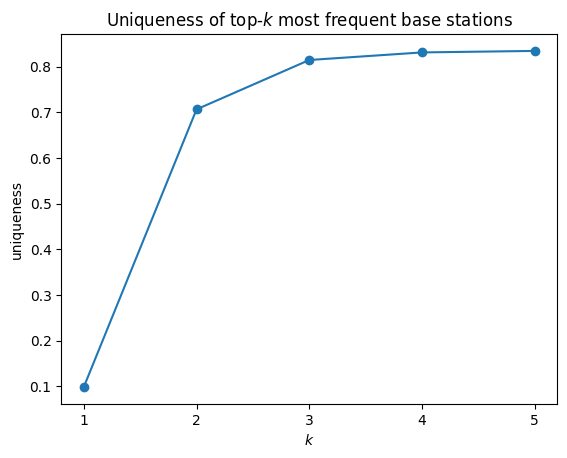

In [25]:
uniqueness = []

for k in [1, 2, 3, 4, 5]:
    mset = dict()

    for locs in topk_freq.values():
        locs = tuple(sorted(locs[:k]))
        mset[locs] = mset.get(locs, 0) + 1

    uniqueness.append(sum(1 for tp in mset.items() if tp[1] == 1) / len(topk_freq))

del mset

plt.plot(['1', '2', '3', '4', '5'], uniqueness, marker='o')
plt.ylabel('uniqueness')
plt.xlabel('$k$')
plt.title('Uniqueness of top-$k$ most frequent base stations')